# Import Libaries, Functions and Dataset

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
%cd drive/MyDrive/ENGG_680_Project/Database/

[Errno 2] No such file or directory: 'drive/MyDrive/ENGG_680_Project/Database/'
/content/drive/MyDrive/ENGG_680_Project/Database


In [41]:
!ls

'SS CFST Database_Finalised_for correlation.xlsx'  'SS CFST Database.xlsx'
'SS CFST Database_Finalised.xlsx'


In [42]:
#importing libraries and linear regression from scikit learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#Loading database
df = pd.read_excel("SS CFST Database_Finalised_for correlation.xlsx")
df_circ = pd.read_excel("SS CFST Database_Finalised_for correlation.xlsx", sheet_name = 2)

# Rectangular Linear Regression Full Data Set

In [43]:
# Define X (features) and y (target)
X = df.drop(columns=['N_Test'])
y = df['N_Test']

#printing shape to confirm number of features and values
print(X.shape)
print(y.shape)

(211, 10)
(211,)


In [44]:
# Split the data into training and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Initialize and train the model
model = LinearRegression(fit_intercept=False)

#training model
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [46]:
# Make predictions
y_pred = model.predict(X_test)

In [47]:
# The coefficients
print('Coefficients: \n', model.coef_)
# The intercept
print('Intercept: \n', model.intercept_)

Coefficients: 
 [-6.15227187e+00  8.75088673e+00  3.45886241e+02  3.08396920e+00
 -2.17835665e+02 -8.31372536e-03  1.83790036e+00 -2.23544062e-01
  4.95766786e+01  4.01742245e+00]
Intercept: 
 0.0


In [48]:
# Calculating error metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 100302.77927093474
R^2 Score: 0.9232272764109034


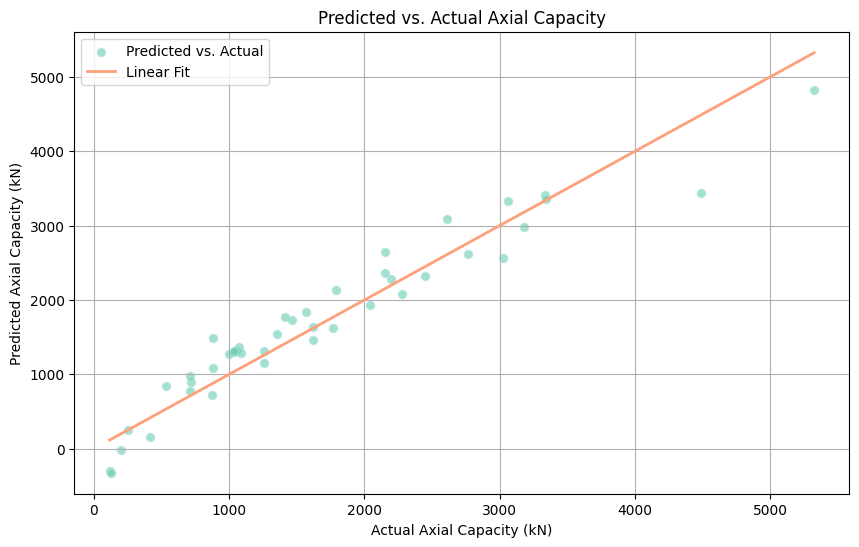

In [49]:
# Scatter Plot: Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='mediumaquamarine', edgecolors='powderblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'lightsalmon', linewidth=2)
plt.xlabel('Actual Axial Capacity (kN)')
plt.ylabel('Predicted Axial Capacity (kN)')
plt.title('Predicted vs. Actual Axial Capacity')
plt.legend(['Predicted vs. Actual','Linear Fit'])
plt.grid(True)
plt.show()

#Rectangular Linear Regression for High Correlation Features

In [50]:
X_high_corr = df.drop(columns=['N_Test', 'L/B', 'E_o', 'fu', 'n', 'fc'])
y_high_corr = df['N_Test']

print(X_high_corr.shape)
print(y_high_corr.shape)

(211, 5)
(211,)


In [51]:
# Split the data into training and test (80% train, 20% test)
X_high_corr_train, X_high_corr_test, y_high_corr_train, y_high_corr_test = train_test_split(X_high_corr, y_high_corr, test_size=0.2, random_state=42)

In [52]:
# Initialize and train the model
model = LinearRegression(fit_intercept=False)

#training model
model.fit(X_high_corr_train, y_high_corr_train)

LinearRegression(fit_intercept=False)

In [53]:
# Make predictions
y_high_corr_pred = model.predict(X_high_corr_test)

In [54]:
# The coefficients
print('Coefficients: \n', model.coef_)
# The intercept
print('Intercept: \n', model.intercept_)

Coefficients: 
 [  0.93342923   8.53452367 395.80880484  -0.50436315  -1.93854094]
Intercept: 
 0.0


In [55]:
# Calculating error metrics
mse = mean_squared_error(y_high_corr_test, y_high_corr_pred)
r2 = r2_score(y_high_corr_test, y_high_corr_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 258450.59313308884
R^2 Score: 0.8021794002891165


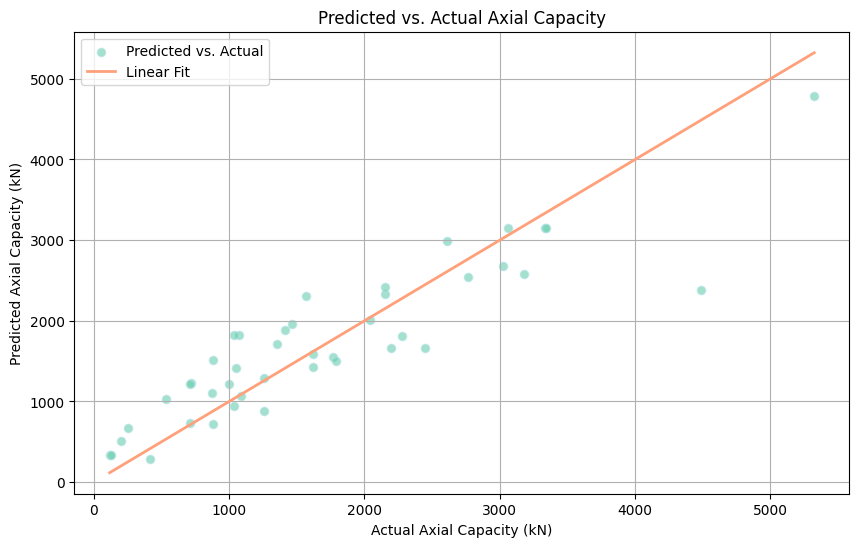

In [56]:
# Scatter Plot: Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_high_corr_test, y_high_corr_pred, alpha=0.6, color='mediumaquamarine', edgecolors='powderblue')
plt.plot([y_high_corr_test.min(), y_high_corr_test.max()], [y_high_corr_test.min(), y_high_corr_test.max()], 'lightsalmon', linewidth=2)
plt.xlabel('Actual Axial Capacity (kN)')
plt.ylabel('Predicted Axial Capacity (kN)')
plt.title('Predicted vs. Actual Axial Capacity')
plt.legend(['Predicted vs. Actual','Linear Fit'])
plt.grid(True)
plt.show()

#Rectangular Linear Regression for Low Correlation Features

In [57]:
X_low_corr = df.drop(columns=['N_Test', 'B', 'H', 't', 'L', 'f_0.2'])
y_low_corr = df['N_Test']

print(X_low_corr.shape)
print(y_low_corr.shape)

(211, 5)
(211,)


In [58]:
# Split the data into training and test (80% train, 20% test)
X_low_corr_train, X_low_corr_test, y_low_corr_train, y_low_corr_test = train_test_split(X_low_corr, y_low_corr, test_size=0.2, random_state=42)

In [59]:
# Initialize and train the model
model = LinearRegression(fit_intercept=False)

#training model
model.fit(X_low_corr_train, y_low_corr_train)

LinearRegression(fit_intercept=False)

In [60]:
# Make predictions
y_low_corr_pred = model.predict(X_low_corr_test)

In [61]:
# The coefficients
print('Coefficients: \n', model.coef_)
# The intercept
print('Intercept: \n', model.intercept_)

Coefficients: 
 [-4.47284711e+01 -4.10145596e-03  3.43105945e+00 -4.82122603e+01
  1.01195805e+01]
Intercept: 
 0.0


In [62]:
# Calculating error metrics
mse = mean_squared_error(y_low_corr_test, y_low_corr_pred)
r2 = r2_score(y_low_corr_test, y_low_corr_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 895289.1750370286
R^2 Score: 0.314736950790102


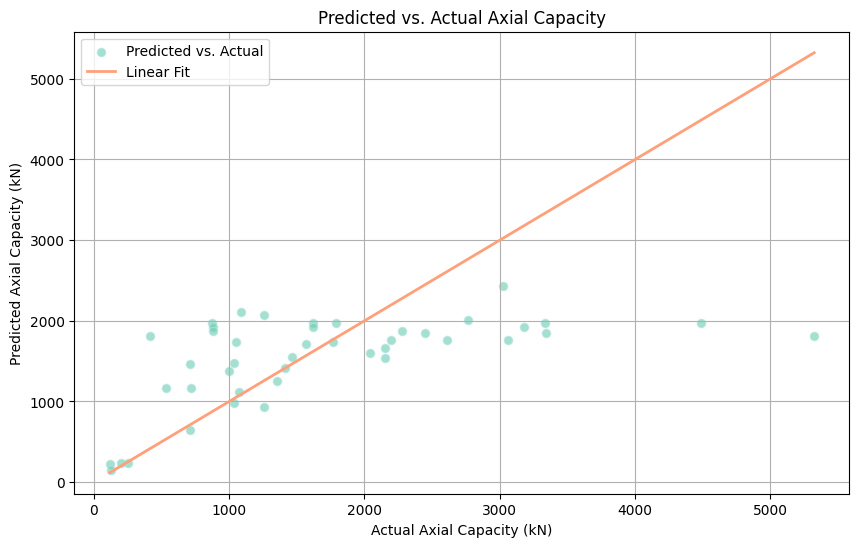

In [63]:
# Scatter Plot: Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_low_corr_test, y_low_corr_pred, alpha=0.6, color='mediumaquamarine', edgecolors='powderblue')
plt.plot([y_low_corr_test.min(), y_low_corr_test.max()], [y_low_corr_test.min(), y_low_corr_test.max()], 'lightsalmon', linewidth=2)
plt.xlabel('Actual Axial Capacity (kN)')
plt.ylabel('Predicted Axial Capacity (kN)')
plt.title('Predicted vs. Actual Axial Capacity')
plt.legend(['Predicted vs. Actual','Linear Fit'])
plt.grid(True)
plt.show()

# Circular Linear Regression for Full Data set

In [64]:
# Define X (features) and y (target)
X = df_circ.drop(columns=['N_Test'])
y = df_circ['N_Test']

#printing shape to confirm number of features and values
print(X.shape)
print(y.shape)

(211, 9)
(211,)


In [65]:
# Split the data into training and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Initialize and train the model
model = LinearRegression(fit_intercept=False)

#training model
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [67]:
# Make predictions
y_pred = model.predict(X_test)

In [68]:
# The coefficients
print('Coefficients: \n', model.coef_)
# The intercept
print('Intercept: \n', model.intercept_)

Coefficients: 
 [-1.70246625e+01  5.00082283e+02  1.03541793e+01 -1.02526453e+03
 -1.21173446e-02  1.02407631e+01 -1.50156664e+00  1.13235534e+02
  1.10162036e+01]
Intercept: 
 0.0


In [69]:
# Calculating error metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 484548.9140286328
R^2 Score: 0.8195216224941163


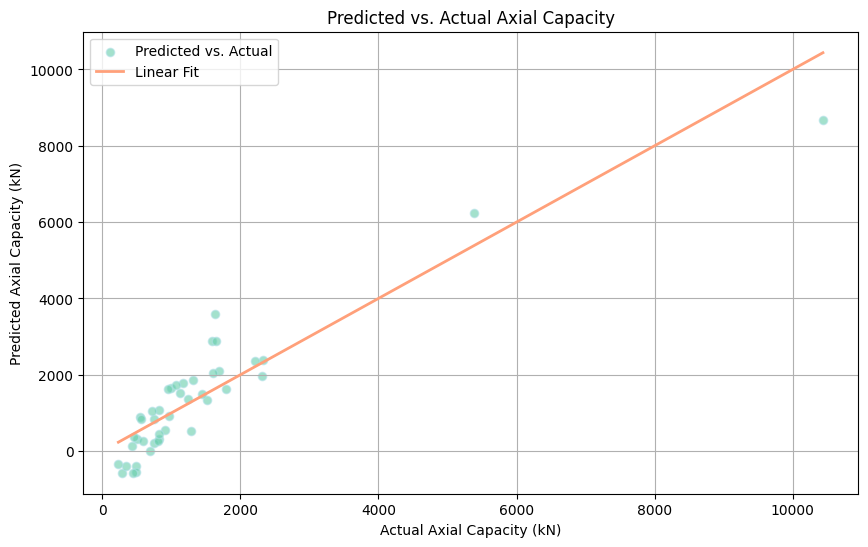

In [70]:
# Scatter Plot: Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='mediumaquamarine', edgecolors='powderblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'lightsalmon', linewidth=2)
plt.xlabel('Actual Axial Capacity (kN)')
plt.ylabel('Predicted Axial Capacity (kN)')
plt.title('Predicted vs. Actual Axial Capacity')
plt.legend(['Predicted vs. Actual','Linear Fit'])
plt.grid(True)
plt.show()

# Circular Linear Regression for High Correlation Features

In [71]:
# Define X (features) and y (target)
X = df_circ[['D','t','L','f0.2']]
y = df_circ['N_Test']

#printing shape to confirm number of features and values
print(X.shape)
print(y.shape)

(211, 4)
(211,)


In [72]:
# Split the data into training and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Initialize and train the model
model = LinearRegression(fit_intercept=False)

#training model
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [74]:
# Make predictions
y_pred = model.predict(X_test)

In [75]:
# The coefficients
print('Coefficients: \n', model.coef_)
# The intercept
print('Intercept: \n', model.intercept_)

Coefficients: 
 [  5.15153251 532.91641481   2.1387057   -4.52414688]
Intercept: 
 0.0


In [76]:
# Calculating error metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 1097118.4386247108
R^2 Score: 0.5913598194070542


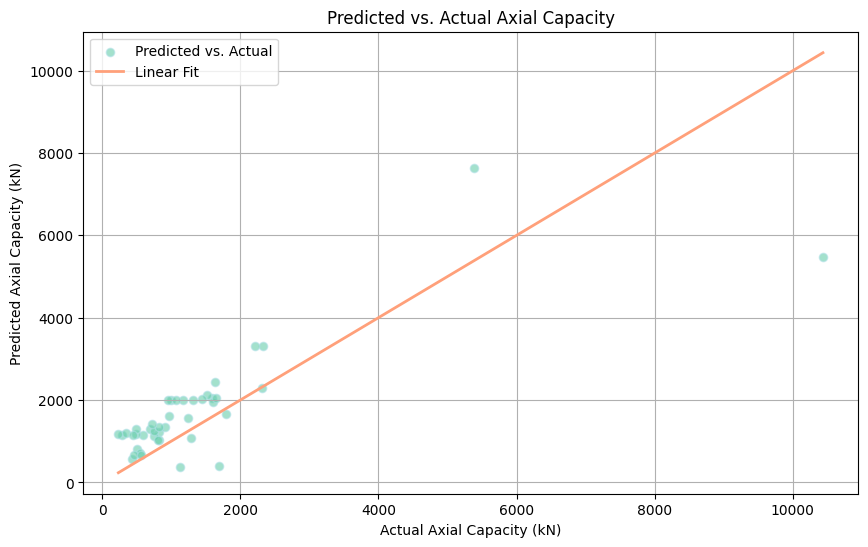

In [77]:
# Scatter Plot: Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='mediumaquamarine', edgecolors='powderblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'lightsalmon', linewidth=2)
plt.xlabel('Actual Axial Capacity (kN)')
plt.ylabel('Predicted Axial Capacity (kN)')
plt.title('Predicted vs. Actual Axial Capacity')
plt.grid(True)
plt.legend(['Predicted vs. Actual','Linear Fit'])
plt.show()

# Circular Linear Regression for Low Correlation Features

In [79]:
# Define X (features) and y (target)
X = df_circ.drop(columns=['D','t','L','f0.2','N_Test'])
y = df_circ['N_Test']

#printing shape to confirm number of features and values
print(X.shape)
print(y.shape)

(211, 5)
(211,)


In [80]:
# Split the data into training and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Initialize and train the model
model = LinearRegression(fit_intercept=False)

#training model
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [82]:
# Make predictions
y_pred = model.predict(X_test)

In [83]:
# The coefficients
print('Coefficients: \n', model.coef_)
# The intercept
print('Intercept: \n', model.intercept_)

Coefficients: 
 [ 1.54471860e-01  9.55694094e-03  5.18520325e-01  4.38443724e+01
 -1.45117310e+01]
Intercept: 
 0.0


In [84]:
# Calculating error metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 2881460.7759900936
R^2 Score: -0.07324843920051904


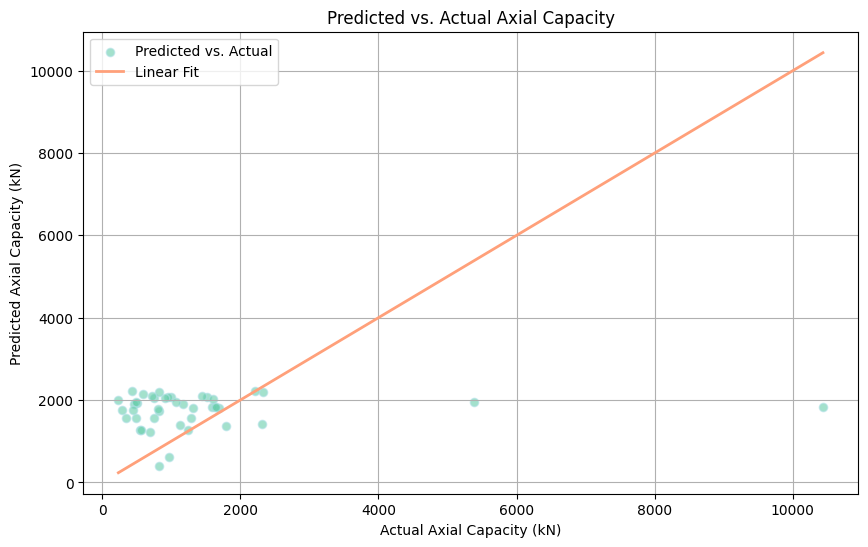

In [85]:
# Scatter Plot: Predicted vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='mediumaquamarine', edgecolors='powderblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'lightsalmon', linewidth=2)
plt.xlabel('Actual Axial Capacity (kN)')
plt.ylabel('Predicted Axial Capacity (kN)')
plt.title('Predicted vs. Actual Axial Capacity')
plt.grid(True)
plt.legend(['Predicted vs. Actual','Linear Fit'])
plt.show()